<a href="https://colab.research.google.com/github/mohazralfathurrazaq/Perbaikan-Nilai-/blob/main/CV_Sesi7_Cifar10_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

https://www.cs.toronto.edu/~kriz/cifar.html

Klasifikasi Gambar berwarna dengan Data Set Cifar10

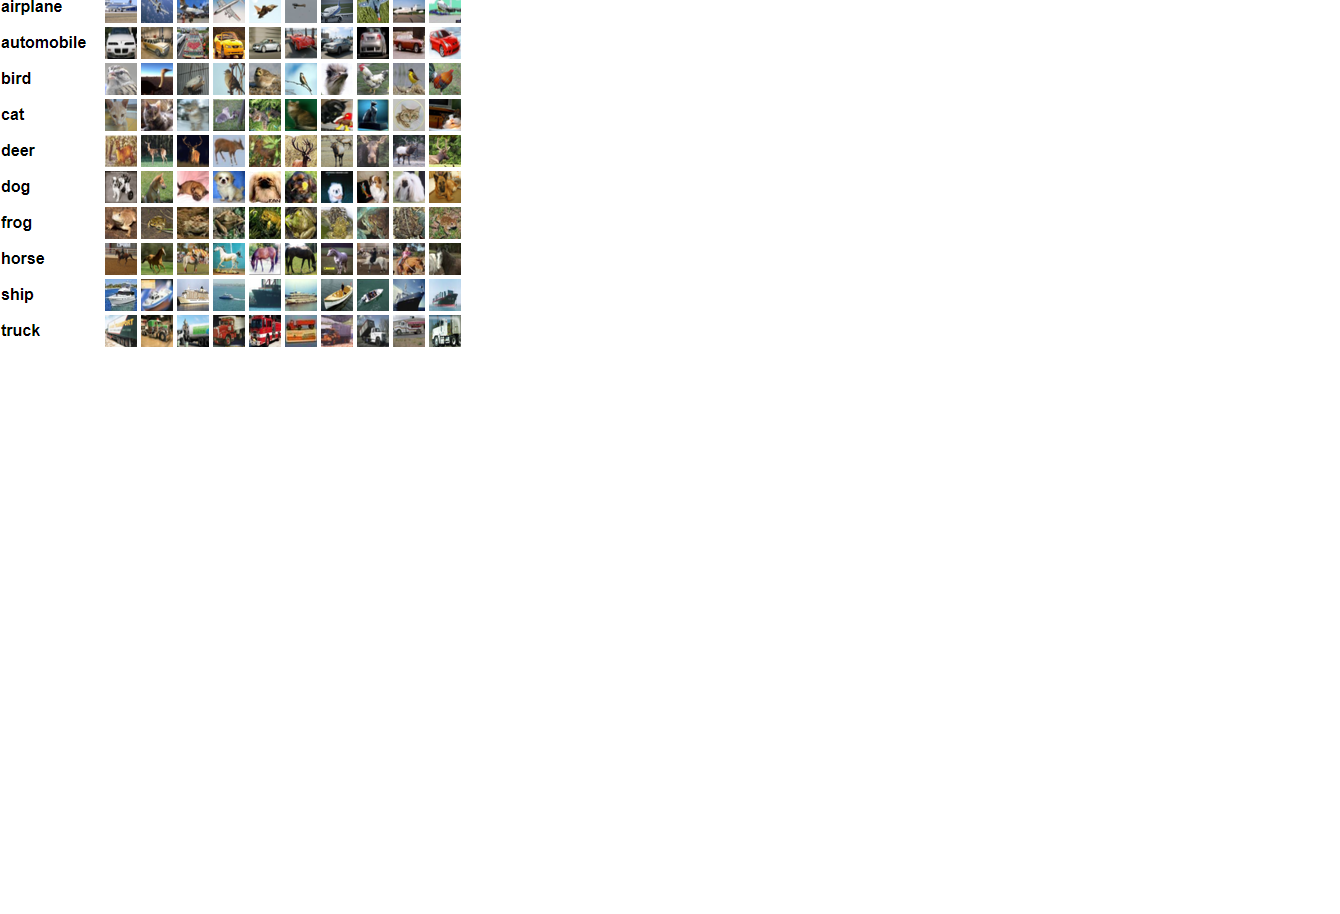


In [4]:
!pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.7 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0



170498071/170498071 [==============================] - 3s 0us/step


VGG-MODEL

In [6]:
# VGG-16 model
vgg_model = VGG16(#weights='imagenet',
                  include_top=False, input_shape=(32, 32, 3))
x = GlobalAveragePooling2D()(vgg_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
vgg_model = Model(inputs=vgg_model.input, outputs=predictions)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = vgg_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 45s 39ms/step - loss: 1.8742 - accuracy: 0.2372 - val_loss: 1.6177 - val_accuracy: 0.3375
Epoch 2/10
782/782 [==============================] - 29s 38ms/step - loss: 1.4253 - accuracy: 0.4492 - val_loss: 1.2418 - val_accuracy: 0.5378
Epoch 3/10
782/782 [==============================] - 31s 40ms/step - loss: 1.0732 - accuracy: 0.6168 - val_loss: 0.9259 - val_accuracy: 0.6779
Epoch 4/10
782/782 [==============================] - 30s 38ms/step - loss: 0.8727 - accuracy: 0.6998 - val_loss: 0.8662 - val_accuracy: 0.7027
Epoch 5/10
782/782 [==============================] - 31s 39ms/step - loss: 0.7403 - accuracy: 0.7498 - val_loss: 0.7876 - val_accuracy: 0.7490
Epoch 6/10
782/782 [==============================] - 31s 39ms/step - loss: 0.6441 - accuracy: 0.7824 - val_loss: 0.7427 - val_accuracy: 0.7571
Epoch 7/10
782/782 [==============================] - 30s 39ms/step - loss: 0.5729 - accuracy: 0.8084 - val_loss: 0.7240 - val_accuracy:

In [9]:
# Evaluate the models
vgg_score = vgg_model.evaluate(x_test, y_test)
print("VGG-16 Model - Test Loss:", vgg_score[0], "Test Accuracy:", vgg_score[1])


313/313 [==============================] - 3s 9ms/step - loss: 0.7039 - accuracy: 0.7919
VGG-16 Model - Test Loss: 0.7038607001304626 Test Accuracy: 0.7918999791145325


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


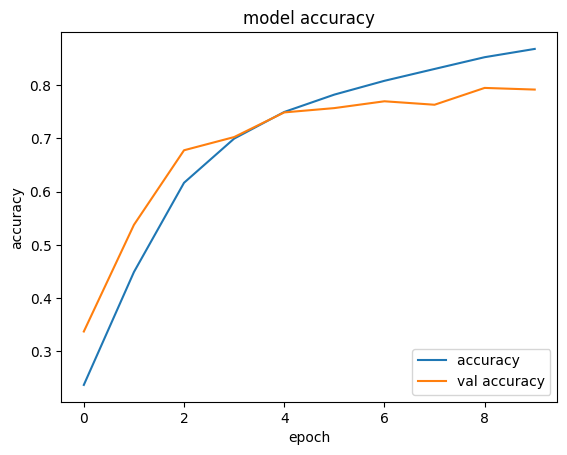

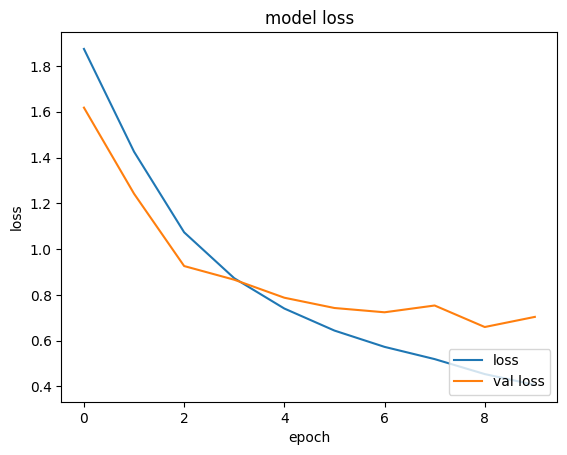

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'],label='accuracy ')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower right')

VGG19


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Load the VGG19 model without the top classification layer
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers for CIFAR-10
model = Sequential([
    base_model,
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history1 = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


80134624/80134624 [==============================] - 0s 0us/step
Epoch 1/10
1563/1563 [==============================] - 37s 18ms/step - loss: 1.4090 - accuracy: 0.5049 - val_loss: 1.3253 - val_accuracy: 0.5279
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2203 - accuracy: 0.5706 - val_loss: 1.2307 - val_accuracy: 0.5676
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1384 - accuracy: 0.5965 - val_loss: 1.1926 - val_accuracy: 0.5817
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0790 - accuracy: 0.6167 - val_loss: 1.2087 - val_accuracy: 0.5778
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0247 - accuracy: 0.6379 - val_loss: 1.1572 - val_accuracy: 0.6025
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9669 - accuracy: 0.6549 - val_loss: 1.1815 - val_accuracy: 0.5941
Epoch 7/10
1563/1563 [==============================] - 27s

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


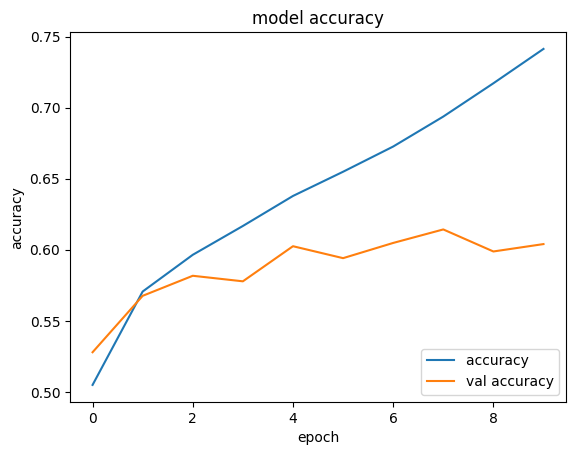

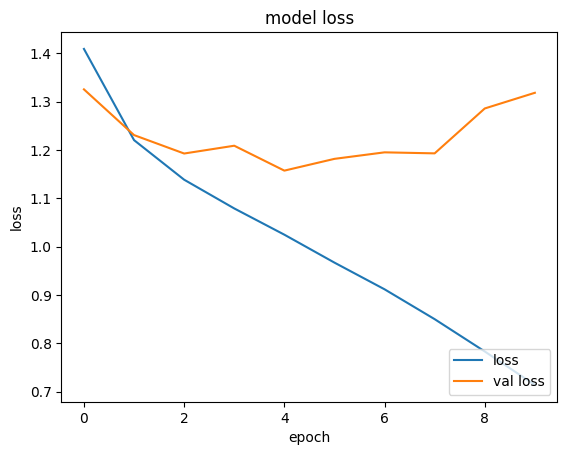

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'],label='accuracy ')
plt.plot(history1.history['val_accuracy'],label='val accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'], label = 'loss')
plt.plot(history1.history['val_loss'],label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower right')